In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Perceptron, PassiveAggressiveClassifier
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC

In [12]:
data = pd.read_csv("drive/MyDrive/AI/Exercises/Polynomial Regression/position_salaries.csv")
print(data.shape)
print(data.values)
data = data.values[:,1:]
print(data)

(10, 3)
[['Business Analyst' 1 45000]
 ['Junior Consultant' 2 50000]
 ['Senior Consultant' 3 60000]
 ['Manager' 4 80000]
 ['Country Manager' 5 110000]
 ['Region Manager' 6 150000]
 ['Partner' 7 200000]
 ['Senior Partner' 8 300000]
 ['C-level' 9 500000]
 ['CEO' 10 1000000]]
[[1 45000]
 [2 50000]
 [3 60000]
 [4 80000]
 [5 110000]
 [6 150000]
 [7 200000]
 [8 300000]
 [9 500000]
 [10 1000000]]


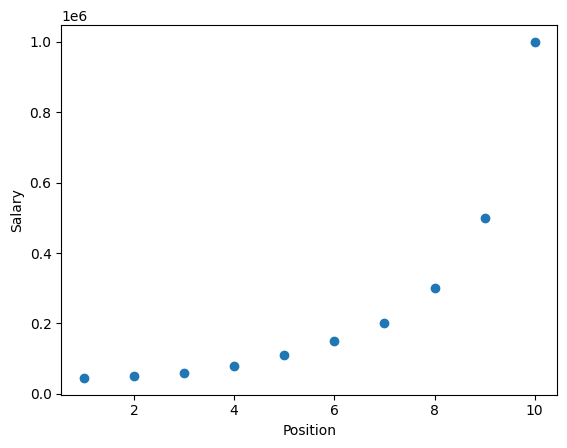

In [16]:
X = data[:, :-1]
y = data[:, -1:]

plt.figure()
plt.scatter(X, y)
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

Best degree: 10 
R2_score: [1.0]


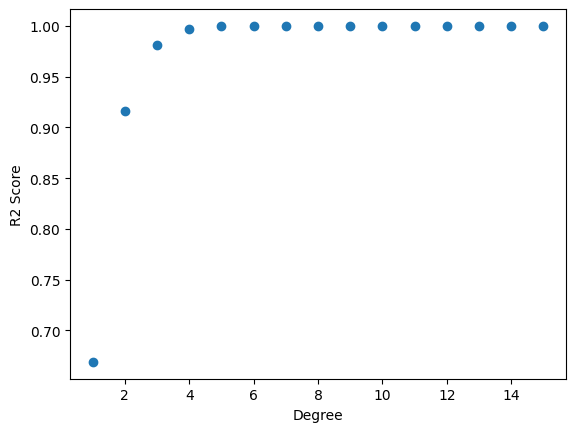

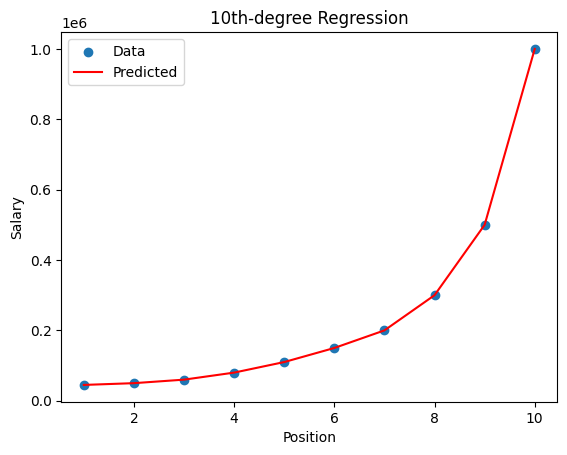

In [51]:
# Transform and fit the data
from sklearn.preprocessing import PolynomialFeatures

max_deg = 15 # max degree of our model
model = LinearRegression()
models_r2_score = []

for deg in range(1, max_deg+1):
  poly = PolynomialFeatures(degree=deg,
                            include_bias=False) # not using w_0
  X_poly = poly.fit_transform(X)
  model.fit(X_poly, y)
  y_pred = model.predict(X_poly)
  models_r2_score.append([r2_score(y, y_pred)])

# Plot performance of every degree
best_deg = np.argmax(models_r2_score)
print("Best degree:", best_deg + 1, "\n" + "R2_score:", models_r2_score[best_deg])  # degree 1 in models_r2_score[0]
plt.figure()
plt.scatter(np.arange(1, max_deg+1), models_r2_score)
plt.xlabel("Degree")
plt.ylabel("R2 Score")
plt.show()


# Plot best degree
poly = PolynomialFeatures(degree=best_deg + 1,
                            include_bias=False) # not using w_0
X_poly = poly.fit_transform(X)
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
models_r2_score.append([r2_score(y, y_pred)])

plt.figure()
plt.title("10th-degree Regression")
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.legend(["Data", "Predicted"])
plt.show()